## Overlap of dataset images for each class

In [13]:
from PIL import Image

In [14]:
def overlay_image(image1, image2):
    background = Image.open(image1)
    overlay = Image.open(image2)

    background = background.convert("RGBA")
    overlay = overlay.convert("RGBA")

    new_img = Image.blend(background, overlay, 0.4)
    
    return new_img

def load_image(image):
    background = Image.open(image)

    return background.convert("RGBA")

In [32]:
rootpath = 'full_set_results/cross_entropy/images/os_32'
ex_image_1 = rootpath+'/0/51_image.png'
ex_target_1 = rootpath+'/0/51_target.png'
ex_image_2 = rootpath+'/3/169_image.png'
ex_target_2 = rootpath+'/3/169_target.png'
ex_image_3 = rootpath+'/3/173_image.png'
ex_target_3 = rootpath+'/3/173_target.png'
ex_image_4 = rootpath+'/4/29_image.png'
ex_target_4 = rootpath+'/4/29_target.png'
ex_image_5 = rootpath+'/0/15_image.png'
ex_target_5 = rootpath+'/0/15_target.png'
ex_image_6 = rootpath+'/0/2_image.png'
ex_target_6 = rootpath+'/0/2_target.png'

images = [ex_image_1, ex_image_2, ex_image_3, ex_image_4, ex_image_5, ex_image_6]
targets = [ex_target_1, ex_target_2, ex_target_3, ex_target_4, ex_target_5, ex_target_6]

In [16]:
bl_root = '../Report/Sample_Images/Baseline/'
bl_overlay_1 = bl_root+'1_51_overlay.png'
bl_overlay_2 = bl_root+'2_169_overlay.png'
bl_overlay_3 = bl_root+'3_173_overlay.png'
bl_overlay_4 = bl_root+'4_29_overlay.png'
bl_overlay_5 = bl_root+'5_15_overlay.png'
bl_overlay_6 = bl_root+'6_2_overlay.png'

baselines = [bl_overlay_1,bl_overlay_2,bl_overlay_3,bl_overlay_4,bl_overlay_5,bl_overlay_6]

In [17]:
acw_root = '../Report/Sample_Images/ACW_final/'
acw_overlay_1 = acw_root+'1_1240_overlay.png'
acw_overlay_2 = acw_root+'2_467_overlay.png'
acw_overlay_3 = acw_root+'3_3992_overlay.png'
acw_overlay_4 = acw_root+'4_3524_overlay.png'
acw_overlay_5 = acw_root+'5_3708_overlay.png'
acw_overlay_6 = acw_root+'6_1045_overlay.png'

acws = [acw_overlay_1,acw_overlay_2,acw_overlay_3,acw_overlay_4,acw_overlay_5,acw_overlay_6]

In [33]:
target_images = [overlay_image(images[c], targets[c]) for c in range(0,6)]
original_images = [load_image(img) for img in images]
bl_images = [load_image(img) for img in baselines]
acw_images = [load_image(img) for img in acws]

In [37]:
all_images = original_images+bl_images+acw_images+target_images

In [38]:
len(all_images)

24

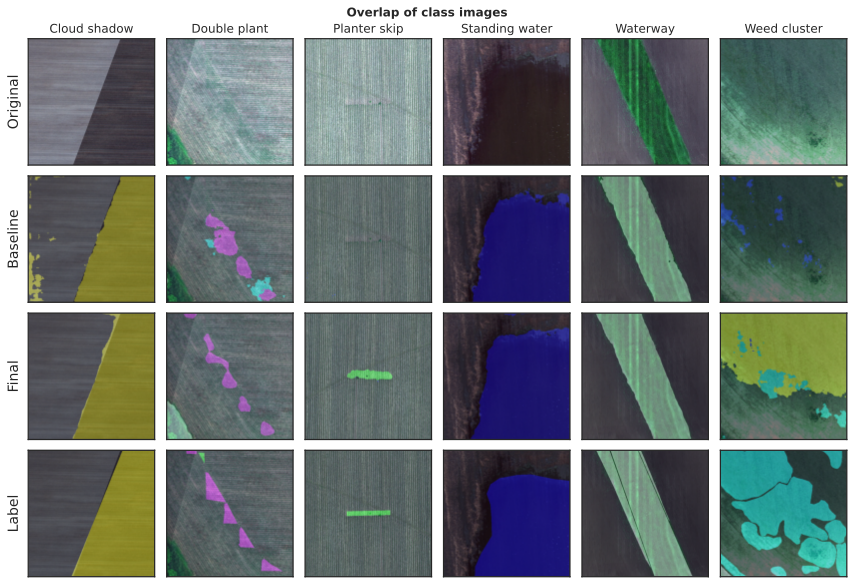

In [48]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')
class_name = ['Cloud shadow', 'Double plant', 'Planter skip', 'Standing water','Waterway', 'Weed cluster']

# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(12,8))
y_labels = ['Original', 'Baseline', 'Final', 'Label']
yidx = 0
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(all_images[i], cmap=plt.cm.jet)
    #plt.colorbar()
    if i < 6:
        plt.title('{}'.format(class_name[i]))
    if i == 0 or i % 6 == 0:
        ax.set_ylabel(y_labels[yidx], fontsize=14)
        yidx+=1
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
plt.tight_layout()
plt.suptitle('Overlap of class images', fontweight='bold', y=1.008)
fig.savefig("../Report/Plots/final_image_comparison.pdf", bbox_inches='tight')
plt.show()